# TP0 (bonus): Optimization of Machine Learning Problems

**Day 1 - AI for Sciences Winter School**

**Instructor:** Raphael Cousin

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/racousin/ai_for_sciences/blob/main/day1/tp0.ipynb)

## Objectives
1. Understand gradient descent
2. Apply gradient descent to MLP with PyTorch
3. Compare CPU vs GPU training performance

## Setup

Run the cell below to install and import the required packages.

In [1]:
# Install the aiforscience package from GitHub
!pip install -q git+https://github.com/racousin/ai_for_sciences.git

import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from aiforscience import (
    plot_gradient_descent_1d,
    plot_loss_history,
    plot_predictions,
    plot_gradient_step,
    plot_nonlinear_data,
    print_model_params,
    print_device_comparison,
    generate_linear_data,
    generate_nonlinear_data,
)

print("Setup complete!")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Setup complete!
PyTorch version: 2.9.1
CUDA available: False


---
# Part 1: Understanding Gradient Descent

**Goal:** Find the value of $\theta$ that minimizes a function $f(\theta)$.

## The Key Idea

Gradient descent is an iterative optimization algorithm:

$$\theta_{new} = \theta_{old} - \eta \cdot \nabla f(\theta_{old})$$

Where:
- $\theta$ is the parameter we want to optimize
- $\eta$ (eta) is the **learning rate** (step size)
- $\nabla f(\theta)$ is the **gradient** (derivative) of the function

## Example Function

Let's minimize $f(\theta) = (3\theta - 7)^2$

**Question:** What is the analytical minimum of this function?

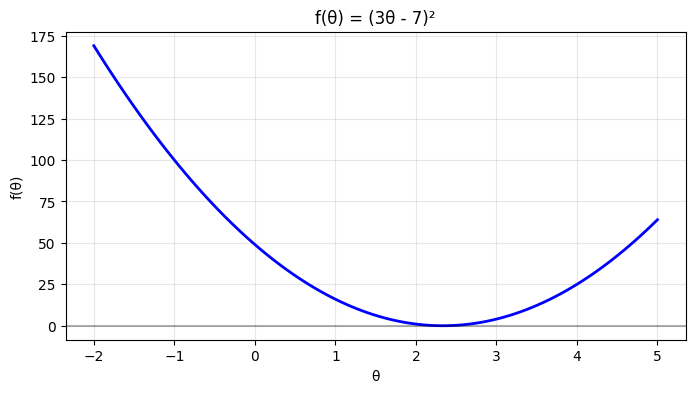

Analytical minimum: θ = 7/3 ≈ 2.3333


In [2]:
# Define the function and its gradient
def f(theta):
    """Function to minimize: (3*theta - 7)^2"""
    return (3 * theta - 7) ** 2

def gradient_f(theta):
    """Gradient of f: d/d_theta [(3*theta - 7)^2] = 2*(3*theta - 7)*3 = 6*(3*theta - 7)"""
    return 6 * (3 * theta - 7)

# Visualize the function
theta_values = np.linspace(-2, 5, 100)
plt.figure(figsize=(8, 4))
plt.plot(theta_values, [f(t) for t in theta_values], 'b-', linewidth=2)
plt.xlabel('θ')
plt.ylabel('f(θ)')
plt.title('f(θ) = (3θ - 7)²')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.show()

print(f"Analytical minimum: θ = 7/3 ≈ {7/3:.4f}")

## Gradient Descent Step by Step

Let's watch one gradient descent step in detail:

Current θ = 0.0
Current f(θ) = 49.0
Gradient at θ: -42.0

Update: θ_new = θ - lr × gradient
        θ_new = 0.0 - 0.05 × -42.0
        θ_new = 2.1


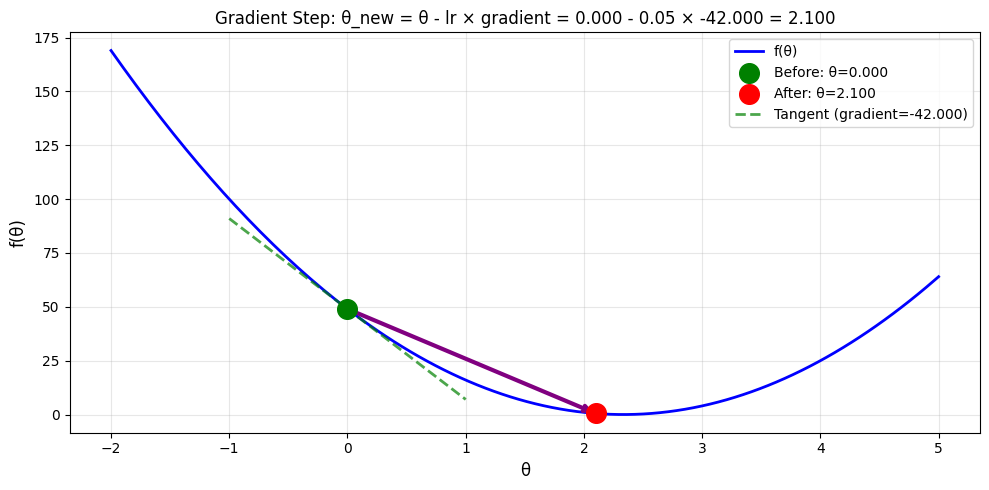

In [3]:
# Start at theta = 0
theta = 0.0
learning_rate = 0.05

# Compute gradient at current position
grad = gradient_f(theta)
print(f"Current θ = {theta}")
print(f"Current f(θ) = {f(theta)}")
print(f"Gradient at θ: {grad}")
print(f"\nUpdate: θ_new = θ - lr × gradient")
print(f"        θ_new = {theta} - {learning_rate} × {grad}")
print(f"        θ_new = {theta - learning_rate * grad}")

# Perform update
theta_new = theta - learning_rate * grad

# Visualize the step
plot_gradient_step(theta, theta_new, grad, learning_rate, f, theta_range=(-2, 5))
plt.show()

## Complete Gradient Descent

Now let's run multiple iterations:

Starting θ: 0.0000
Final θ: 2.3333
True minimum: 2.3333


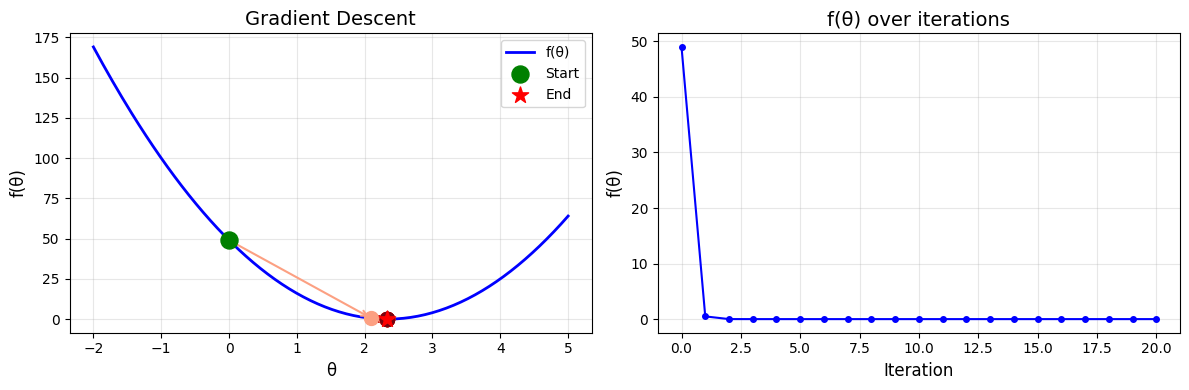

In [4]:
def gradient_descent(f, gradient_f, theta_init, learning_rate, n_iterations):
    """
    Perform gradient descent optimization.
    
    Args:
        f: Function to minimize
        gradient_f: Gradient of f
        theta_init: Starting value
        learning_rate: Step size
        n_iterations: Number of steps
    
    Returns:
        theta_history: List of theta values at each step
    """
    theta = theta_init
    theta_history = [theta]
    
    for i in range(n_iterations):
        grad = gradient_f(theta)
        theta = theta - learning_rate * grad
        theta_history.append(theta)
        
    return theta_history

# Run gradient descent
theta_history = gradient_descent(
    f=f,
    gradient_f=gradient_f,
    theta_init=0.0,
    learning_rate=0.05,
    n_iterations=20
)

print(f"Starting θ: {theta_history[0]:.4f}")
print(f"Final θ: {theta_history[-1]:.4f}")
print(f"True minimum: {7/3:.4f}")

# Visualize
plot_gradient_descent_1d(f, theta_history, theta_range=(-2, 5))
plt.show()

---
## Exercise 1: Experiment with Learning Rate

Try different learning rates and observe the behavior:
- `learning_rate = 0.01` (small)
- `learning_rate = 0.05` (medium)
- `learning_rate = 0.15` (large)
- `learning_rate = 0.35` (too large?)

**Questions:**
1. What happens with a very small learning rate?
2. What happens with a very large learning rate?
3. What is a good learning rate for this problem?

Learning rate: 0.05
Final θ: 2.3333 (target: 2.3333)


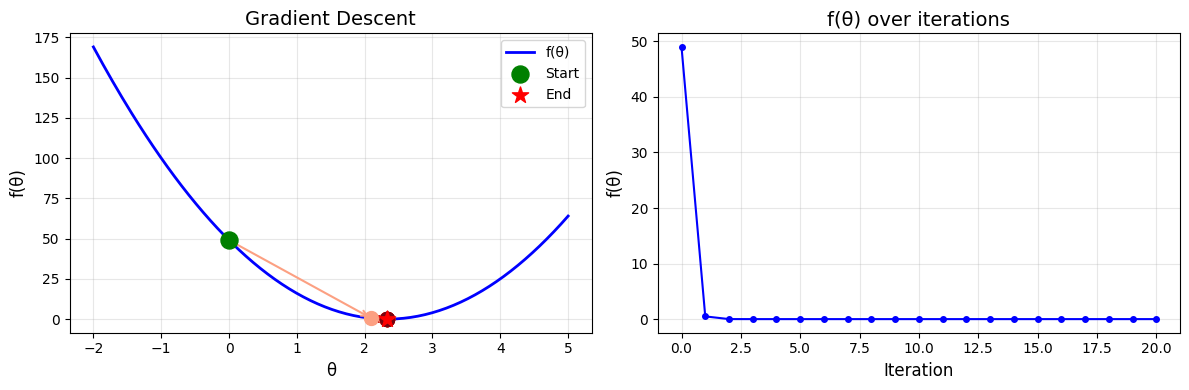

In [5]:
# TODO: Try different learning rates
learning_rate = 0.05  # <-- Modify this value!

theta_history = gradient_descent(
    f=f,
    gradient_f=gradient_f,
    theta_init=0.0,
    learning_rate=learning_rate,
    n_iterations=20
)

print(f"Learning rate: {learning_rate}")
print(f"Final θ: {theta_history[-1]:.4f} (target: {7/3:.4f})")
plot_gradient_descent_1d(f, theta_history, theta_range=(-2, 5))
plt.show()

---
## Exercise 2: Try a Different Function

Modify the function to minimize. Try: $f(\theta) = \theta^2 + 5\theta + 6$

**Hint:** The gradient is $\nabla f(\theta) = 2\theta + 5$

Analytical minimum: θ = -2.5
Final θ: -2.4907


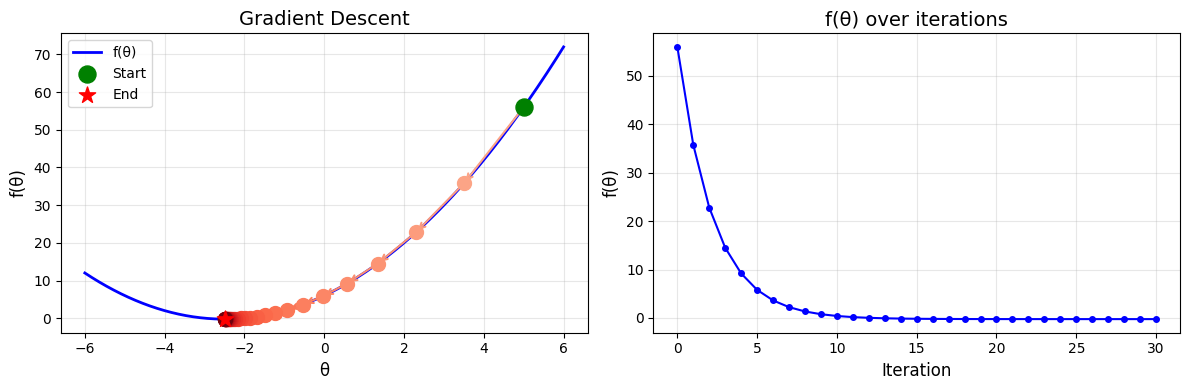

In [6]:
# TODO: Define a new function and its gradient
def f2(theta):
    return theta**2 + 5*theta + 6  # Modify this!

def gradient_f2(theta):
    return 2*theta + 5  # Modify this!

# What's the analytical minimum? (hint: set gradient to 0)
analytical_min = -5/2  # theta where gradient = 0
print(f"Analytical minimum: θ = {analytical_min}")

# Run gradient descent
theta_history = gradient_descent(
    f=f2,
    gradient_f=gradient_f2,
    theta_init=5.0,
    learning_rate=0.1,
    n_iterations=30
)

print(f"Final θ: {theta_history[-1]:.4f}")
plot_gradient_descent_1d(f2, theta_history, theta_range=(-6, 6))
plt.show()

---
# Part 2: Linear Regression with PyTorch

Now we apply gradient descent to a real machine learning problem: **linear regression**.

**Goal:** Find weights $w$ and bias $b$ such that $\hat{y} = Xw + b$ minimizes the Mean Squared Error (MSE):

$$\mathcal{L} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

## Generate a Dataset

Generated linear dataset:
  - Samples: 100
  - Features: 1
  - X shape: torch.Size([100, 1])
  - y shape: torch.Size([100, 1])
  - True weights: [1.49014246]
  - True bias: 5.0000


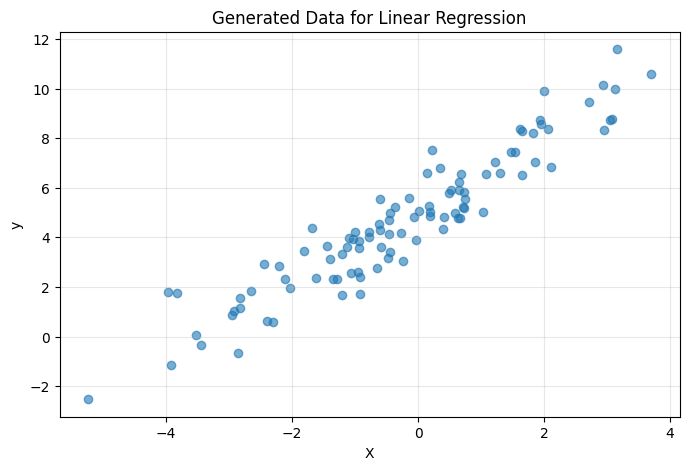

In [7]:
# Generate synthetic data with larger bias (makes it harder to learn)
X, y, true_weights, true_bias = generate_linear_data(
    n_samples=100,
    n_features=1,
    noise=1.0,
    bias=5.0,        # Large bias makes initial predictions far off
    weight_scale=3.0,
    seed=42
)

# Visualize the data
plt.figure(figsize=(8, 5))
plt.scatter(X.numpy(), y.numpy(), alpha=0.6)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Data for Linear Regression')
plt.grid(True, alpha=0.3)
plt.show()

## Create a Linear Model


 Initial Model Parameters

  weight:
    Shape: [1, 1]
    Values: [-0.8910375833511353]
    Requires grad: True

  bias:
    Shape: [1]
    Values: [-0.7357568740844727]
    Requires grad: True

  Total parameters: 2

Initial Loss (MSE): 45.5667


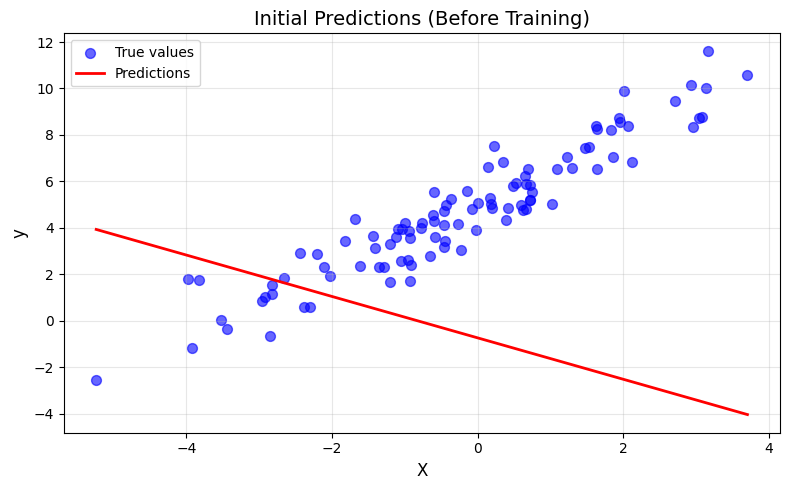

In [8]:
# Create a simple linear model: y = Xw + b
model = nn.Linear(in_features=1, out_features=1)

# Show initial (random) parameters
print_model_params(model, "Initial Model Parameters")

# Make initial predictions
with torch.no_grad():
    y_pred_initial = model(X)
    initial_loss = nn.MSELoss()(y_pred_initial, y)

print(f"Initial Loss (MSE): {initial_loss.item():.4f}")

# Visualize initial predictions
plot_predictions(X.numpy(), y.numpy(), y_pred_initial.numpy(), 
                title="Initial Predictions (Before Training)")
plt.show()

## Loss Function and Optimizer

**Loss Function (MSE):** Measures how far predictions are from true values.
$$\mathcal{L} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

**Optimizer (SGD):** Updates parameters using gradient descent.
$$\theta_{new} = \theta_{old} - \eta \cdot \nabla \mathcal{L}$$

The optimizer handles:
- Computing parameter updates from gradients
- Applying the learning rate
- Advanced techniques like momentum (in other optimizers)

In [9]:
# Reset model
model = nn.Linear(in_features=1, out_features=1)

# Loss function: Mean Squared Error
loss_fn = nn.MSELoss()

# Optimizer: Stochastic Gradient Descent
learning_rate = 0.01  # Smaller lr needed for this harder problem
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Show the loss of the initial (untrained) model
with torch.no_grad():
    y_pred = model(X)
    loss = loss_fn(y_pred, y)

print(f"Loss function: MSE (Mean Squared Error)")
print(f"Optimizer: SGD (Stochastic Gradient Descent)")
print(f"Learning rate: {learning_rate}")
print(f"\nInitial model loss: {loss.item():.4f}")
print(f"\nThis loss is high because the model parameters are random!")

Loss function: MSE (Mean Squared Error)
Optimizer: SGD (Stochastic Gradient Descent)
Learning rate: 0.01

Initial model loss: 33.1706

This loss is high because the model parameters are random!


## Training Step - Detailed View

Let's look at ONE training step in detail to understand what's happening:

In [10]:
print("="*60)
print(" DETAILED TRAINING STEP")
print("="*60)

# Step 0: Show current parameters
print("\n[BEFORE] Parameters:")
for name, param in model.named_parameters():
    print(f"  {name}: {param.data.numpy().flatten()}")

# Step 1: Forward pass - compute predictions
print("\n[STEP 1] Forward pass: y_pred = model(X)")
y_pred = model(X)
print(f"  Predictions shape: {y_pred.shape}")

# Step 2: Compute loss
print("\n[STEP 2] Compute loss: loss = MSE(y_pred, y)")
loss = loss_fn(y_pred, y)
print(f"  Loss value: {loss.item():.6f}")

# Step 3: Zero gradients (important!)
print("\n[STEP 3] Zero gradients: optimizer.zero_grad()")
optimizer.zero_grad()
print("  Gradients reset to zero")

# Step 4: Backward pass - compute gradients
print("\n[STEP 4] Backward pass: loss.backward()")
loss.backward()
print("  Gradients computed:")
for name, param in model.named_parameters():
    print(f"    {name}.grad: {param.grad.numpy().flatten()}")

# Step 5: Update parameters
print("\n[STEP 5] Update parameters: optimizer.step()")
print(f"  Rule: param_new = param_old - lr * gradient")
optimizer.step()

# Show updated parameters
print("\n[AFTER] Parameters:")
for name, param in model.named_parameters():
    print(f"  {name}: {param.data.numpy().flatten()}")

print("\n" + "="*60)

 DETAILED TRAINING STEP

[BEFORE] Parameters:
  weight: [0.00068831]
  bias: [-0.38557982]

[STEP 1] Forward pass: y_pred = model(X)
  Predictions shape: torch.Size([100, 1])

[STEP 2] Compute loss: loss = MSE(y_pred, y)
  Loss value: 33.170589

[STEP 3] Zero gradients: optimizer.zero_grad()
  Gradients reset to zero

[STEP 4] Backward pass: loss.backward()
  Gradients computed:
    weight.grad: [-6.9488897]
    bias.grad: [-10.118615]

[STEP 5] Update parameters: optimizer.step()
  Rule: param_new = param_old - lr * gradient

[AFTER] Parameters:
  weight: [0.07017721]
  bias: [-0.28439367]



## Full Training Loop

In [11]:
# Reset model and optimizer
model = nn.Linear(in_features=1, out_features=1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training parameters
n_epochs = 200
losses = []

# Training loop
for epoch in range(n_epochs):
    # Forward pass
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    
    # Print every 40 epochs
    if (epoch + 1) % 40 == 0:
        print(f"Epoch {epoch+1:3d}: Loss = {loss.item():.6f}")

# Final results
print("\n" + "="*40)
print(" TRAINING COMPLETE")
print("="*40)
print(f"Initial loss: {losses[0]:.4f}")
print(f"Final loss:   {losses[-1]:.4f}")

print(f"\nLearned parameters:")
for name, param in model.named_parameters():
    print(f"  {name}: {param.data.numpy().flatten()}")
print(f"\nTrue parameters:")
print(f"  weight: {true_weights.flatten()}")
print(f"  bias: {true_bias}")

Epoch  40: Loss = 6.813999
Epoch  80: Loss = 2.094963
Epoch 120: Loss = 1.119807
Epoch 160: Loss = 0.917981
Epoch 200: Loss = 0.876208

 TRAINING COMPLETE
Initial loss: 30.3487
Final loss:   0.8762

Learned parameters:
  weight: [1.411861]
  bias: [4.920226]

True parameters:
  weight: [1.49014246]
  bias: [5.]


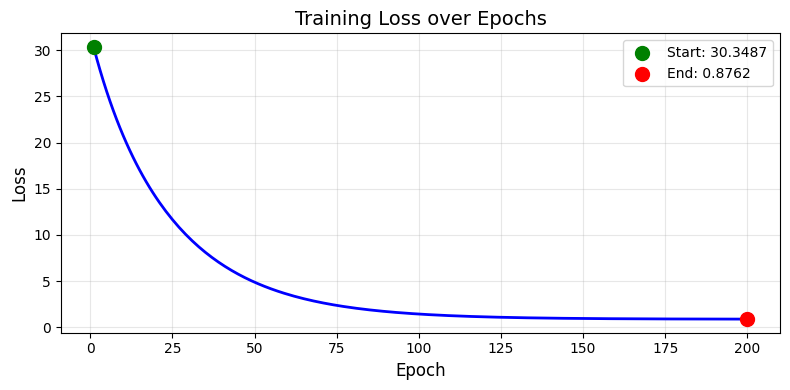

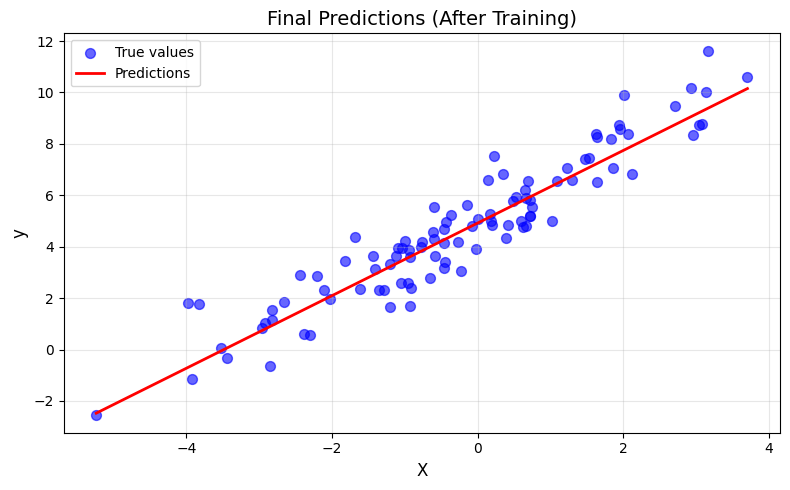

In [12]:
# Visualize training progress
plot_loss_history(losses, title="Training Loss over Epochs")
plt.show()

# Visualize final predictions
with torch.no_grad():
    y_pred_final = model(X)
plot_predictions(X.numpy(), y.numpy(), y_pred_final.numpy(), 
                title="Final Predictions (After Training)")
plt.show()

---
## Exercise 3: Experiment with Training Parameters

Modify the code below to experiment with:
1. **Learning rate:** Try `0.001`, `0.01`, `0.1`, `0.5`
2. **Number of epochs:** Try `50`, `200`, `500`

**Questions:**
- What happens if the learning rate is too high?
- How many epochs are needed to converge?

Learning rate: 0.01, Epochs: 200
Final loss: 0.873765


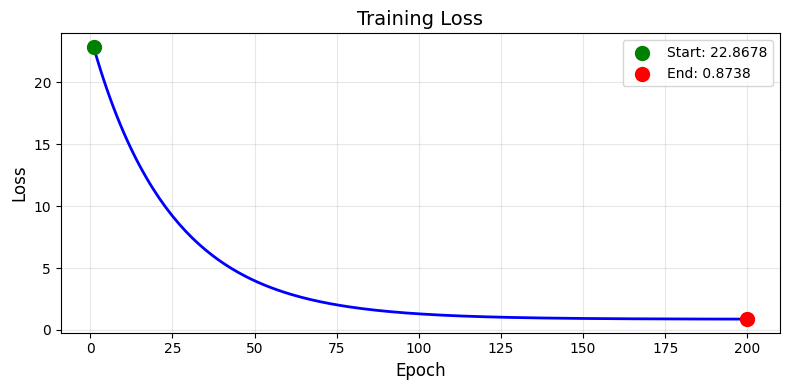

In [13]:
# TODO: Modify these parameters
learning_rate = 0.01  # <-- Try different values!
n_epochs = 200        # <-- Try different values!

# Reset model
model = nn.Linear(in_features=1, out_features=1)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
losses = []

# Training loop
for epoch in range(n_epochs):
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

print(f"Learning rate: {learning_rate}, Epochs: {n_epochs}")
print(f"Final loss: {losses[-1]:.6f}")
plot_loss_history(losses)
plt.show()

---
## Exercise 4: Modify the Dataset

Try different dataset configurations:
- More samples: `n_samples=500`
- More noise: `noise=3.0`
- More features: `n_features=3`

Generated linear dataset:
  - Samples: 100
  - Features: 1
  - X shape: torch.Size([100, 1])
  - y shape: torch.Size([100, 1])
  - True weights: [1.49014246]
  - True bias: 5.0000
Final loss: 0.879275


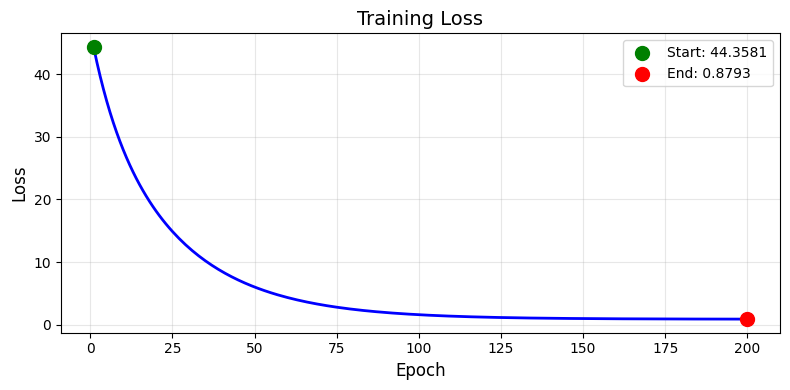

In [14]:
# TODO: Modify dataset parameters
X_new, y_new, true_w, true_b = generate_linear_data(
    n_samples=100,   # <-- Try 500
    n_features=1,    # <-- Try 3
    noise=1.0,       # <-- Try 3.0
    bias=5.0,
    seed=42
)

# Create and train model
n_features = X_new.shape[1]
model = nn.Linear(in_features=n_features, out_features=1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
losses = []

for epoch in range(200):
    y_pred = model(X_new)
    loss = loss_fn(y_pred, y_new)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

print(f"Final loss: {losses[-1]:.6f}")
plot_loss_history(losses)
plt.show()

---
## Exercise 5: Build a Neural Network for Non-Linear Data

Linear models can only learn linear relationships. Let's try a **non-linear** dataset that **requires** a neural network!

A neural network is multiple linear layers with **non-linear activation functions** between them.

Generated non-linear dataset:
  - Samples: 300
  - Features: 2
  - X shape: torch.Size([300, 2])
  - y shape: torch.Size([300, 1])
  - Pattern: y = sin(2*r) + 0.5*cos(3*angle) + noise
  - This data CANNOT be solved by a linear model!


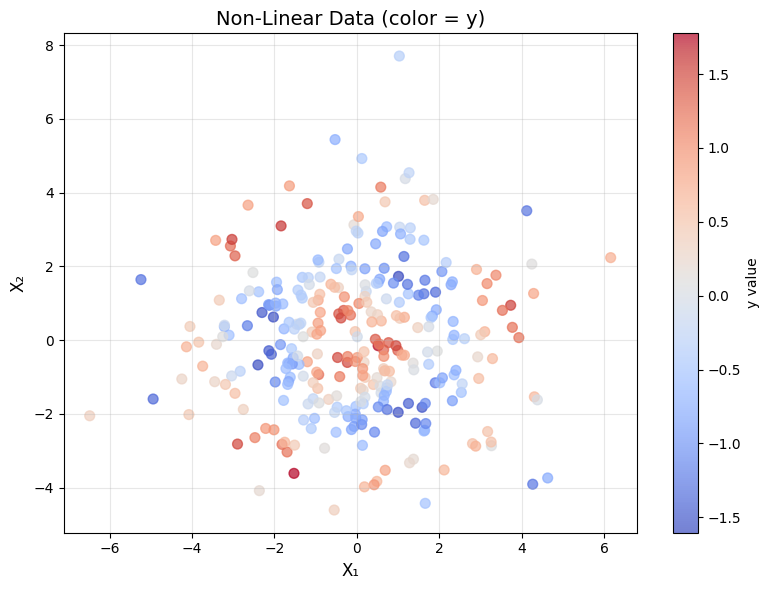

In [15]:
# Generate non-linear data
X_nl, y_nl = generate_nonlinear_data(n_samples=300, noise=0.2, seed=42)

# Visualize: color shows the target value
plot_nonlinear_data(X_nl.numpy(), y_nl.numpy(), title="Non-Linear Data (color = y)")
plt.show()

In [16]:
# First, let's try a LINEAR model on this non-linear data
linear_model = nn.Linear(in_features=2, out_features=1)
optimizer = torch.optim.SGD(linear_model.parameters(), lr=0.01)
linear_losses = []

for epoch in range(500):
    y_pred = linear_model(X_nl)
    loss = loss_fn(y_pred, y_nl)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    linear_losses.append(loss.item())

print(f"Linear model final loss: {linear_losses[-1]:.4f}")
print("The linear model cannot learn this pattern!")

Linear model final loss: 0.6501
The linear model cannot learn this pattern!


In [17]:
# Now let's use a NEURAL NETWORK
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(2, 32),   # Input: 2 features -> 32 neurons
            nn.ReLU(),           # Non-linear activation!
            nn.Linear(32, 32),   # Hidden: 32 -> 32 neurons
            nn.ReLU(),           # Non-linear activation!
            nn.Linear(32, 1)     # Output: 32 -> 1
        )
    
    def forward(self, x):
        return self.layers(x)

# Create and train neural network
nn_model = NeuralNetwork()
optimizer = torch.optim.Adam(nn_model.parameters(), lr=0.01)  # Adam works better here
nn_losses = []

for epoch in range(500):
    y_pred = nn_model(X_nl)
    loss = loss_fn(y_pred, y_nl)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    nn_losses.append(loss.item())
    
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}: Loss = {loss.item():.4f}")

print(f"\nNeural network final loss: {nn_losses[-1]:.4f}")
print(f"Linear model final loss: {linear_losses[-1]:.4f}")
print(f"\nThe neural network learns the non-linear pattern!")

Epoch 100: Loss = 0.1819
Epoch 200: Loss = 0.1384
Epoch 300: Loss = 0.1303
Epoch 400: Loss = 0.1044
Epoch 500: Loss = 0.0971

Neural network final loss: 0.0971
Linear model final loss: 0.6501

The neural network learns the non-linear pattern!


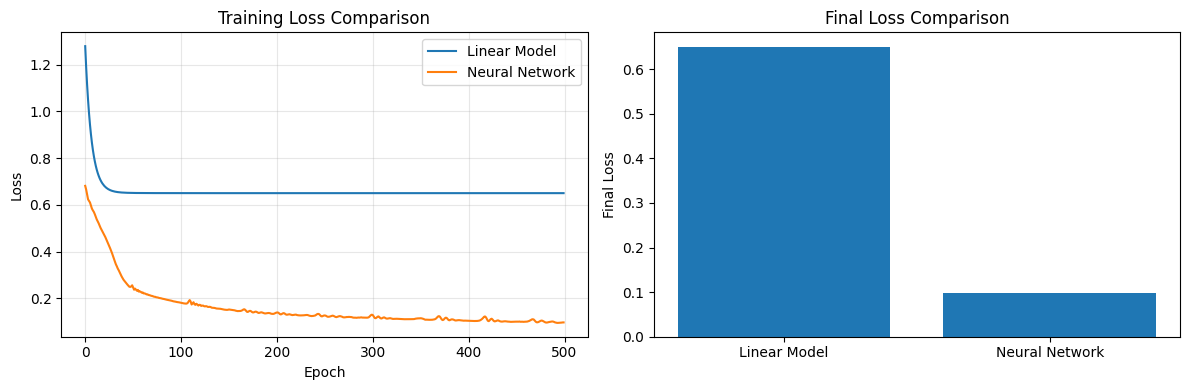

In [18]:
# Compare the two models
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(linear_losses, label='Linear Model')
plt.plot(nn_losses, label='Neural Network')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.bar(['Linear Model', 'Neural Network'], 
        [linear_losses[-1], nn_losses[-1]])
plt.ylabel('Final Loss')
plt.title('Final Loss Comparison')

plt.tight_layout()
plt.show()

---
# Part 3: CPU vs GPU Performance

Deep learning benefits enormously from GPU acceleration. Let's compare training speed on CPU vs GPU.

## Setting Up GPU in Colab

To use GPU in Google Colab:
1. Go to **Runtime** > **Change runtime type**
2. Select **GPU** as the Hardware accelerator
3. Click **Save**

In [19]:
# Check available devices
print("Device Information:")
print(f"  CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"  GPU name: {torch.cuda.get_device_name(0)}")
    print(f"  GPU memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")

Device Information:
  CUDA available: False


## Benchmark Function

We'll train the same model on CPU and GPU and compare the time.

In [20]:
import time

def train_model(X, y, device, n_epochs=1000, hidden_size=128, n_layers=4, verbose=True):
    """
    Train a neural network and measure time.
    
    Args:
        X, y: Training data
        device: 'cpu' or 'cuda'
        n_epochs: Number of training epochs
        hidden_size: Neurons per hidden layer
        n_layers: Number of hidden layers
        verbose: Print progress
    """
    # Move data to device
    X_dev = X.to(device)
    y_dev = y.to(device)
    
    # Build model
    layers = []
    in_features = X.shape[1]
    for i in range(n_layers):
        layers.append(nn.Linear(in_features, hidden_size))
        layers.append(nn.ReLU())
        in_features = hidden_size
    layers.append(nn.Linear(hidden_size, 1))
    
    model = nn.Sequential(*layers).to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    loss_fn = nn.MSELoss()
    
    # Count parameters
    n_params = sum(p.numel() for p in model.parameters())
    if verbose:
        print(f"Model: {n_layers} hidden layers, {hidden_size} neurons each")
        print(f"Total parameters: {n_params:,}")
        print(f"Device: {device}")
    
    # Warm-up (for GPU)
    if device == 'cuda':
        for _ in range(10):
            y_pred = model(X_dev)
            loss = loss_fn(y_pred, y_dev)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        torch.cuda.synchronize()
    
    # Timed training
    start_time = time.time()
    
    for epoch in range(n_epochs):
        y_pred = model(X_dev)
        loss = loss_fn(y_pred, y_dev)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Ensure GPU operations are complete
    if device == 'cuda':
        torch.cuda.synchronize()
    
    elapsed_time = time.time() - start_time
    
    if verbose:
        print(f"Training time: {elapsed_time:.4f} seconds")
        print(f"Final loss: {loss.item():.6f}")
    
    return elapsed_time, loss.item()

## Run the Benchmark

In [21]:
# Generate larger dataset for meaningful comparison
X_large, y_large, _, _ = generate_linear_data(
    n_samples=5000,
    n_features=20,
    noise=0.5,
    seed=42
)

print("\n" + "="*50)
print(" TRAINING ON CPU")
print("="*50)
cpu_time, cpu_loss = train_model(
    X_large, y_large, 
    device='cpu', 
    n_epochs=500,
    hidden_size=256,
    n_layers=4
)

if torch.cuda.is_available():
    print("\n" + "="*50)
    print(" TRAINING ON GPU")
    print("="*50)
    gpu_time, gpu_loss = train_model(
        X_large, y_large, 
        device='cuda', 
        n_epochs=500,
        hidden_size=256,
        n_layers=4
    )
    
    # Print comparison
    print_device_comparison(cpu_time, gpu_time)
else:
    print("\n" + "="*50)
    print(" GPU NOT AVAILABLE")
    print("="*50)
    print("To enable GPU in Colab:")
    print("  Runtime > Change runtime type > GPU")

Generated linear dataset:
  - Samples: 5000
  - Features: 20
  - X shape: torch.Size([5000, 20])
  - y shape: torch.Size([5000, 1])
  - True weights: [ 1.49014246 -0.4147929   1.94306561  4.56908957 -0.70246012 -0.70241087
  4.73763845  2.30230419 -1.40842316  1.62768013 -1.39025308 -1.39718926
  0.72588681 -5.73984073 -5.1747535  -1.68686259 -3.03849336  0.942742
 -2.72407223 -4.2369111 ]
  - True bias: 5.0000

 TRAINING ON CPU
Model: 4 hidden layers, 256 neurons each
Total parameters: 203,009
Device: cpu
Training time: 4.2030 seconds
Final loss: nan

 GPU NOT AVAILABLE
To enable GPU in Colab:
  Runtime > Change runtime type > GPU


---
## Exercise 6: Scale Up the Model

Try increasing the model size to see bigger GPU speedups:
- More data: `n_samples=10000`
- More features: `n_features=50`
- Bigger network: `hidden_size=512`, `n_layers=6`
- More epochs: `n_epochs=1000`

In [22]:
# TODO: Modify these parameters to see larger speedups
n_samples = 5000      # <-- Try 10000, 20000
n_features = 20       # <-- Try 50, 100
hidden_size = 256     # <-- Try 512, 1024
n_layers = 4          # <-- Try 6, 8
n_epochs = 500        # <-- Try 1000

X_test, y_test, _, _ = generate_linear_data(
    n_samples=n_samples,
    n_features=n_features,
    noise=0.5,
    seed=42
)

print("\nCPU Training:")
cpu_time, _ = train_model(
    X_test, y_test, 'cpu', n_epochs=n_epochs,
    hidden_size=hidden_size, n_layers=n_layers
)

if torch.cuda.is_available():
    print("\nGPU Training:")
    gpu_time, _ = train_model(
        X_test, y_test, 'cuda', n_epochs=n_epochs,
        hidden_size=hidden_size, n_layers=n_layers
    )
    print_device_comparison(cpu_time, gpu_time)

Generated linear dataset:
  - Samples: 5000
  - Features: 20
  - X shape: torch.Size([5000, 20])
  - y shape: torch.Size([5000, 1])
  - True weights: [ 1.49014246 -0.4147929   1.94306561  4.56908957 -0.70246012 -0.70241087
  4.73763845  2.30230419 -1.40842316  1.62768013 -1.39025308 -1.39718926
  0.72588681 -5.73984073 -5.1747535  -1.68686259 -3.03849336  0.942742
 -2.72407223 -4.2369111 ]
  - True bias: 5.0000

CPU Training:
Model: 4 hidden layers, 256 neurons each
Total parameters: 203,009
Device: cpu
Training time: 4.2069 seconds
Final loss: nan


---
# Summary

In this practical, you learned:

1. **Gradient Descent**: The core optimization algorithm
   - $\theta_{new} = \theta_{old} - \eta \cdot \nabla f(\theta)$
   - Learning rate controls step size

2. **PyTorch Training Loop**:
   - Forward pass: `y_pred = model(X)`
   - Compute loss: `loss = loss_fn(y_pred, y)`
   - Zero gradients: `optimizer.zero_grad()`
   - Backward pass: `loss.backward()`
   - Update parameters: `optimizer.step()`

3. **Linear vs Non-Linear**: Neural networks can learn patterns that linear models cannot

4. **CPU vs GPU**: GPUs can dramatically accelerate deep learning training